# Data Science Project: 
## UCI Machine Learning Repository: 
### Default of Credit Card Clients Dataset - Default Payments of Credit Card Clients in Taiwan from 2005
The objective for this project is to conduct data exploration analysis on the dataset and apply eXtreme Gradient Boosting (XGBoost) classification to 
<br>1) Understand the key features/predictors that determines whether an individual will default their credit card bills <br>2) Predicts whether an individual will default on their credit card bills 
<br>XGBoost is an algorithm that has recently been dominating applied machine learning and Kaggle competitions for structured or tabular data and is an implementation of gradient boosted decision trees designed for speed and performance.

In [152]:
#Import the necessary libraries required for this project
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
sns.set(font_scale=1)

import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
# Stratified Split of train and test data
from sklearn.cross_validation import StratifiedShuffleSplit
from collections import Counter

### Dataset information in a summarized view
There are <b>25</b> variables:
<br>
<b>ID</b>: ID of each client <br>
<b>LIMIT_BAL</b>: Amount of given credit in NT dollars (includes individual and family/supplementary credit <br>
<b>SEX</b>: Gender (1=male, 2=female) <br>
<b>EDUCATION</b>: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown) <br>
<b>MARRIAGE</b>: Marital status (1=married, 2=single, 3=others) <br>
<b>AGE</b>: Age in years <br>
<b>PAY_0</b>: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above) <br>
<b>PAY_2</b>: Repayment status in August, 2005 (scale same as above) <br>
<b>PAY_3</b>: Repayment status in July, 2005 (scale same as above) <br>
<b>PAY_4</b>: Repayment status in June, 2005 (scale same as above) <br>
<b>PAY_5</b>: Repayment status in May, 2005 (scale same as above) <br>
<b>PAY_6</b>: Repayment status in April, 2005 (scale same as above) <br>
<b>BILL_AMT1</b>: Amount of bill statement in September, 2005 (NT dollar) <br>
<b>BILL_AMT2</b>: Amount of bill statement in August, 2005 (NT dollar) <br>
<b>BILL_AMT3</b>: Amount of bill statement in July, 2005 (NT dollar) <br>
<b>BILL_AMT4</b>: Amount of bill statement in June, 2005 (NT dollar) <br>
<b>BILL_AMT5</b>: Amount of bill statement in May, 2005 (NT dollar) <br>
<b>BILL_AMT6</b>: Amount of bill statement in April, 2005 (NT dollar) <br>
<b>PAY_AMT1</b>: Amount of previous payment in September, 2005 (NT dollar) <br>
<b>PAY_AMT2</b>: Amount of previous payment in August, 2005 (NT dollar) <br>
<b>PAY_AMT3</b>: Amount of previous payment in July, 2005 (NT dollar) <br>
<b>PAY_AMT4</b>: Amount of previous payment in June, 2005 (NT dollar) <br>
<b>PAY_AMT5</b>: Amount of previous payment in May, 2005 (NT dollar) <br>
<b>PAY_AMT6</b>: Amount of previous payment in April, 2005 (NT dollar) <br>
<b>default.payment.next.month</b>: Default payment (1=yes, 0=no) <br>

In [153]:
# load in the data and display the top 10 rows to have a sense of the dataset
url = './data/default_of_credit_card_clients.csv'
creditcarddata = pd.read_csv(url)
creditcarddata.head(10)

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
6,6,50000,1,1,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
7,7,500000,1,1,2,29,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
8,8,100000,2,2,2,23,0,-1,-1,0,...,221,-159,567,380,601,0,581,1687,1542,0
9,9,140000,2,3,1,28,0,0,2,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0


In [154]:
#Remove the top row header that is irrelevant and set the index
new_header = creditcarddata.iloc[0] #grab the first row for the header using integer loc
creditcarddata = creditcarddata[1:] #take the data less the header row
creditcarddata.columns = new_header #set the header row as the df header
creditcarddata = creditcarddata.set_index('ID') #set the index

#rename the default.payment.next.month to more readable format
creditcarddata = creditcarddata.rename(columns = {'default payment next month':'DEFAULT_FLAG'})
creditcarddata.head(10)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT_FLAG
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
6,50000,1,1,2,37,0,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
7,500000,1,1,2,29,0,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
8,100000,2,2,2,23,0,-1,-1,0,0,...,221,-159,567,380,601,0,581,1687,1542,0
9,140000,2,3,1,28,0,0,2,0,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0


In [155]:
print ('There are {0} rows and {1} attributes.'.format(creditcarddata.shape[0], creditcarddata.shape[1]))

There are 30000 rows and 24 attributes.


The last column <b>"DEFAULT_FLAG"</b> (1: Default, 0:No Default) will by our response variable (y) and the rest of the 23 variables will by our features/predictors (X). In addition, XGBoost requires all features to be numeric, which we will handle that later.

In [156]:
creditcarddata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
LIMIT_BAL       30000 non-null object
SEX             30000 non-null object
EDUCATION       30000 non-null object
MARRIAGE        30000 non-null object
AGE             30000 non-null object
PAY_0           30000 non-null object
PAY_2           30000 non-null object
PAY_3           30000 non-null object
PAY_4           30000 non-null object
PAY_5           30000 non-null object
PAY_6           30000 non-null object
BILL_AMT1       30000 non-null object
BILL_AMT2       30000 non-null object
BILL_AMT3       30000 non-null object
BILL_AMT4       30000 non-null object
BILL_AMT5       30000 non-null object
BILL_AMT6       30000 non-null object
PAY_AMT1        30000 non-null object
PAY_AMT2        30000 non-null object
PAY_AMT3        30000 non-null object
PAY_AMT4        30000 non-null object
PAY_AMT5        30000 non-null object
PAY_AMT6        30000 non-null object
DEFAULT_FLAG    30000 

In [157]:
# Show the distribution of the dataset for the features/predictors (X)
#creditcarddata = creditcarddata.apply(pd.to_numeric, errors='coerce')
#creditcarddata.plot(kind='density', subplots=True, layout=(8,8), sharex=False)
#plt.show()

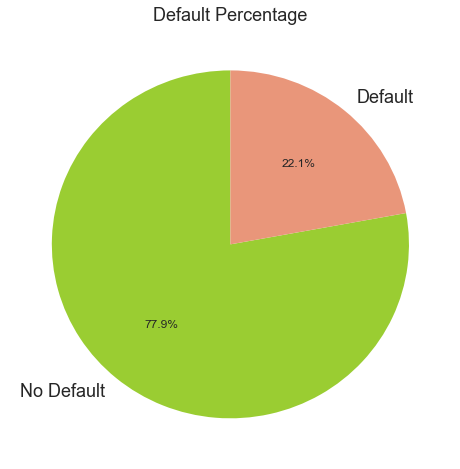

In [158]:
# Show the distribution of the dataset for the response class (y)
plt.subplots(figsize=(8, 8))
sizes = creditcarddata['DEFAULT_FLAG'].value_counts().values
patches, texts, autotexts= plt.pie(sizes, labels=['No Default', 'Default'],
                                  colors=['yellowgreen','darksalmon'],
                                  autopct="%1.1f%%", 
                                  startangle=90)

texts[0].set_fontsize(18)
texts[1].set_fontsize(18)
plt.title('Default Percentage', fontsize=18)
plt.show()

Based on the distribution above, clearly the dataset is <b>highly imbalanced (not the ideal 50/50 split) and is slightly bias towards No-Defaulting</b>. As per above, close to <b>78%</b> of the dataset have observations with the response variable as '0' as compared <b>22%</b> with response variable as '1'. Apart from that, dataset is relatively clean and suitable for XGBoost classifier as most of the features vector are numeric in nature.

### Dataset preprocessing and cleaning

In [159]:
# Convert column PAY_0 to PAY_1 to conform to dataset info
creditcarddata.rename(columns={'PAY_0':'PAY_1'}, inplace=True)
# Check each individual feature/predictors to see outliers/anomalis values
print 'SEX:' + creditcarddata.SEX.unique()
print 'EDUCATION:' + creditcarddata.EDUCATION.unique()
print 'MARRIAGE:' + creditcarddata.MARRIAGE.unique()
print 'DEFAULT_FLAG:' + creditcarddata.DEFAULT_FLAG.unique()

['SEX:2' 'SEX:1']
['EDUCATION:2' 'EDUCATION:1' 'EDUCATION:3' 'EDUCATION:5' 'EDUCATION:4'
 'EDUCATION:6' 'EDUCATION:0']
['MARRIAGE:1' 'MARRIAGE:2' 'MARRIAGE:3' 'MARRIAGE:0']
['DEFAULT_FLAG:1' 'DEFAULT_FLAG:0']


Based on the above data sanity checks, <b>EDUCATION</b> and <b> MARRIAGE</b> have outlier values that fall outside the defined range as per the dataset info. We will proceed to clean them up. Since the dataset info did have a 'Others' categorical value for both features/predictors, we will encode them to the <b>'Others'</b> bucket.

In [160]:
# EDUCATION - Encode all records with values {0,5,6} to {4}
mapping = {'0':'4','5':'4','6':'4'}
creditcarddata.replace({'EDUCATION': mapping}, inplace=True)
creditcarddata.EDUCATION.unique()

array(['2', '1', '3', '4'], dtype=object)

In [161]:
# MARRIAGE - Encode all records with values {0} to {3}
mapping = {'0':'3'}
creditcarddata.replace({'MARRIAGE': mapping}, inplace=True)
creditcarddata.MARRIAGE.unique()

array(['1', '2', '3'], dtype=object)

In [162]:
# As per documentation, XGBoost only works with numeric vectors. Hence need to convert the entire dataframe to numeric
creditcarddata = creditcarddata.apply(pd.to_numeric, errors='coerce')
creditcarddata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
LIMIT_BAL       30000 non-null int64
SEX             30000 non-null int64
EDUCATION       30000 non-null int64
MARRIAGE        30000 non-null int64
AGE             30000 non-null int64
PAY_1           30000 non-null int64
PAY_2           30000 non-null int64
PAY_3           30000 non-null int64
PAY_4           30000 non-null int64
PAY_5           30000 non-null int64
PAY_6           30000 non-null int64
BILL_AMT1       30000 non-null int64
BILL_AMT2       30000 non-null int64
BILL_AMT3       30000 non-null int64
BILL_AMT4       30000 non-null int64
BILL_AMT5       30000 non-null int64
BILL_AMT6       30000 non-null int64
PAY_AMT1        30000 non-null int64
PAY_AMT2        30000 non-null int64
PAY_AMT3        30000 non-null int64
PAY_AMT4        30000 non-null int64
PAY_AMT5        30000 non-null int64
PAY_AMT6        30000 non-null int64
DEFAULT_FLAG    30000 non-null int64
dtypes: 

In [163]:
#Display the dataset after preprocessing/cleaning
creditcarddata.head(10)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT_FLAG
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
6,50000,1,1,2,37,0,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
7,500000,1,1,2,29,0,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
8,100000,2,2,2,23,0,-1,-1,0,0,...,221,-159,567,380,601,0,581,1687,1542,0
9,140000,2,3,1,28,0,0,2,0,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0


### Setup the XGBoost Model for classification to work

In [164]:
# split data into X (features/predictors) and y (response variable)
X = creditcarddata.iloc[:,0:23] # use integer location to slice the dataset to scope it from feature 1 -23, exclude 24
y = creditcarddata.iloc[:,23:24] # scope it to 24 as the response variable - DEFAULT_FLAG

# split the X and Y data into a training and test dataset to avoid underfitting/overfitting the model 
# The training set will be used to prepare the XGBoost model and the test set will be used to make new predictions
# 70/30 rule to indicate the percentage of the data that should be held over for training/testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)
#print y_train['DEFAULT_FLAG'].value_counts()
#print y_test['DEFAULT_FLAG'].value_counts()
print('y_train dataset shape {}'.format(Counter(y_train['DEFAULT_FLAG'])))
print('y_test dataset shape {}'.format(Counter(y_test['DEFAULT_FLAG'])))
print('')

# fit the model with the training set
model = XGBClassifier()
model.fit(X_train,y_train)
print model

y_train dataset shape Counter({0: 16345, 1: 4655})
y_test dataset shape Counter({0: 7019, 1: 1981})

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)


In [165]:
# make predictions for test data and round the prediction probabilities.. 
# alternatively, can also apply a threshold that maximises recall/precision/f1 score instead of rounding
y_pred = model.predict(X_test)
# XGBoost outputs probabilities by default and not actual class labels. 
# To calculate accuracy we need to convert these to a 0/1 label by rounding
predictions_binary = [round(value) for value in y_pred]

# model evaluation based on performance measures
accuracy = accuracy_score(y_test, predictions_binary)
print('Accuracy: %.2f%%' % (accuracy * 100.0))
print('Error Rate: %.2f%%' % (100-(accuracy * 100.0)))
print('')

print ('Confusion Matrix:')
print(confusion_matrix(y_test, predictions_binary))
tn, fp, fn, tp = confusion_matrix(y_test, predictions_binary).ravel()

print('')
print('Precision:%.2f%%' % ((float(tp)/(tp + fp))* 100.0))
print('Recall: %.2f%%' % (((float(tp)/(tp + fn)))* 100.0))


Accuracy: 82.04%
Error Rate: 17.96%

Confusion Matrix:
[[6675  344]
 [1272  709]]

Precision:67.33%
Recall: 35.79%


Based on the metrics above, we can see that the model has an <b>accuracy rate of 82.04%</b> with an <b>error rate of 17.96%</b>. However, <b>Precision and Recall rate</b> are relatively low - <b>67.33% and 35.79% respectively</b>. Accuracy score alone is not a good enough metric as it doesn't differentiate between false positive and false negative. Based on our objective, we are targetting for <b>High Recall = Fewer False Negative</b>. I.e Fewer number of false predictions that a person actually will default but the model predicts that it will not default/in good credit standing, <b>resulting in huge losses due to bad debts.</b>
<br/>
Another of my thought process is that the dataset given is unbalanced, hence <b>the training/testing set used is highly skewed</b> to one class variable although randomly chosen, leading to <b>underfitting of the model</b>.

#### Plot correlation matrix to glean some insights into the features vector (X) 

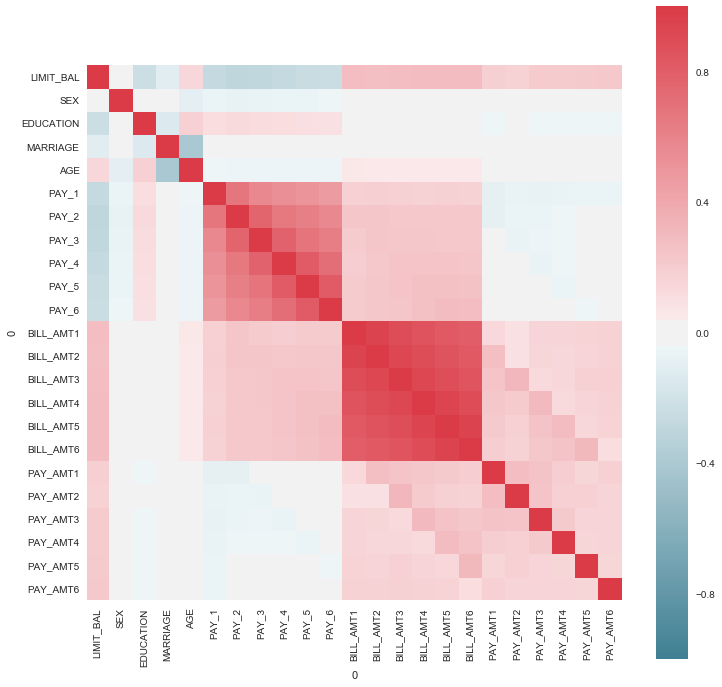

In [166]:
f, ax = plt.subplots(figsize=(12, 12))
corr = X.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), 
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

Noise on weak variables that ends up correlating by chance with the target variable can limit the effectiveness of boosting algorithms, and this can more easily happen on deeper splits in the decision tree, where the data being assessed has already been grouped into a small subset.

The more variables you add, the more likely it is that you will get weakly correlated variables that just happen to look good to the split selection algorithm for some specific combination, which then creates trees that learn this noise instead of the intended signal, and ultimately generalise badly.

### Review and Improve the Performance Metrics

Drawing inspiration from the report by Jesus Gomez and Jammy Loeur from the Department of Computer Science in California State University whereby their project also worked on the same dataset, I decided to try out the following strategies to improve the prediction model:

1) Derive new and meaningful features for classification from existing features vector <br/>
2) Apply stratified sampling to dataset to ensure distribution of training/testing class proportion is same as of the whole dataset or splitted proportionally/equally across. This treatment ensures each subgroup within the whole dataset receives proper representation within the training/testing dataset <br/>
3) Target class rebalancing to ensure that the training dataset is 50/50 distribution of default/non-default observations using Undersampling from imbalanced-learn APIs <br/>
4) Tune the XGBoost model using parameters such as 'max_depth' and 'n_estimators'<br/>

#### 1) Derive new and meaningful features for classification - AMT_OWNED_LABELS_NUM (4=None, 3=Low, 2=Medium, 1=High)

In [167]:
# As the dataset is highly dimensional/bias, derive more meaningful features based on human knowledge of the real world.
# Create AMT_OWNED feature by taking (SUM(BILL_AMT1..6) - SUM(PAY_AMT1..6)) for each record in the dataset, axis=1 (column_wise)
creditcarddata['AMT_OWNED'] = creditcarddata[['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']].sum(axis=1) - creditcarddata[['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']].sum(axis=1)

# To give it more logical meaning, bucket the AMT_OWNED into intervals/binning data
# AMT_OWNED: (NT$0-$1=None, NT$1-$100000=Low, NT$100001-$500000=Medium, >NT$500001=High)
creditcarddata['AMT_OWNED_LABELS'] = pd.cut(creditcarddata.AMT_OWNED, bins=[0, 1, 100001, 500000, np.inf], include_lowest=True, right=False, labels=['None','Low','Medium','High'])

# Encode string class values as integers as XGBOOST only works with numeric datatype
# AMT_OWNED_LABELS_NUM: (4=None, 3=Low, 2=Medium, 1=High)
label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(creditcarddata['AMT_OWNED_LABELS'])
creditcarddata['AMT_OWNED_LABELS_NUM'] = label_encoder.transform(creditcarddata['AMT_OWNED_LABELS'])

# Replace all AMT_OWNED_LABELS_NUM=4 due to NAN generated for AMT_OWNED_LABELS  (-2894	NaN	0). Observations whereby client overpay their bill payments
creditcarddata.AMT_OWNED_LABELS_NUM.replace([0], [4], inplace=True)

creditcarddata.head(30)
#print creditcarddata.AMT_OWNED_LABELS_NUM.unique()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT_FLAG,AMT_OWNED,AMT_OWNED_LABELS,AMT_OWNED_LABELS_NUM
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,689,0,0,0,0,1,7015,Low,2
2,120000,2,2,2,26,-1,2,0,0,0,...,0,1000,1000,1000,0,2000,1,12077,Low,2
3,90000,2,2,2,34,0,0,0,0,0,...,1518,1500,1000,1000,1000,5000,0,90635,Low,2
4,50000,2,2,1,37,0,0,0,0,0,...,2000,2019,1200,1100,1069,1000,0,222946,Medium,3
5,50000,1,2,1,57,-1,0,-1,0,0,...,2000,36681,10000,9000,689,679,0,50290,Low,2
6,50000,1,1,2,37,0,0,0,0,0,...,2500,1815,657,1000,1000,800,0,230342,Medium,3
7,500000,1,1,2,29,0,0,0,0,0,...,55000,40000,38000,20239,13750,13770,0,2543836,High,1
8,100000,2,2,2,23,0,-1,-1,0,0,...,380,601,0,581,1687,1542,0,8695,Low,2
9,140000,2,3,1,28,0,0,2,0,0,...,3329,0,432,1000,1000,1000,0,58451,Low,2


#### 1) Derive new and meaningful features for classification - MISSED_PAYMENT  (-1 is good, >1 is bad)

In [168]:
# Derive the maximium number of missed payments recorded for the individual 
# The higher the number of "MISSED_PAYMENT", the higher the number of missed credit card payments, implying bad credit standing
creditcarddata['MISSED_PAYMENT'] = creditcarddata[['PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']].max(axis=1)
creditcarddata.head(10)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT_FLAG,AMT_OWNED,AMT_OWNED_LABELS,AMT_OWNED_LABELS_NUM,MISSED_PAYMENT
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,1,7015,Low,2,2
2,120000,2,2,2,26,-1,2,0,0,0,...,1000,1000,1000,0,2000,1,12077,Low,2,2
3,90000,2,2,2,34,0,0,0,0,0,...,1500,1000,1000,1000,5000,0,90635,Low,2,0
4,50000,2,2,1,37,0,0,0,0,0,...,2019,1200,1100,1069,1000,0,222946,Medium,3,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,36681,10000,9000,689,679,0,50290,Low,2,0
6,50000,1,1,2,37,0,0,0,0,0,...,1815,657,1000,1000,800,0,230342,Medium,3,0
7,500000,1,1,2,29,0,0,0,0,0,...,40000,38000,20239,13750,13770,0,2543836,High,1,0
8,100000,2,2,2,23,0,-1,-1,0,0,...,601,0,581,1687,1542,0,8695,Low,2,0
9,140000,2,3,1,28,0,0,2,0,0,...,0,432,1000,1000,1000,0,58451,Low,2,2


#### Clean up the dataset with the new features by dropping weak features/predictors

In [169]:
# Remove the original features after adding the derived features
# Drop "PAY1-PAY6", "BILL_AMT1-BILL_AMT6" , "PAY_AMT1-PAY_AMT6", "AMT_OWNED", "AMT_OWNED_LABELS"
creditcarddata.drop(['PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6'],axis=1,inplace=True)
creditcarddata.drop(['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6'],axis=1,inplace=True)
creditcarddata.drop(['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6'],axis=1,inplace=True)
creditcarddata.drop(['AMT_OWNED','AMT_OWNED_LABELS'],axis=1,inplace=True)

# Reorder the creditcarddata dataframe columms after tweaking the features vector for XGBoost model 
creditcarddata = creditcarddata[['LIMIT_BAL','SEX','EDUCATION','MARRIAGE','AGE','AMT_OWNED_LABELS_NUM','MISSED_PAYMENT','DEFAULT_FLAG']]

creditcarddata.head(10)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,AMT_OWNED_LABELS_NUM,MISSED_PAYMENT,DEFAULT_FLAG
ID,,,,,,,,
1,20000,2,2,1,24,2,2,1
2,120000,2,2,2,26,2,2,1
3,90000,2,2,2,34,2,0,0
4,50000,2,2,1,37,3,0,0
5,50000,1,2,1,57,2,0,0
6,50000,1,1,2,37,3,0,0
7,500000,1,1,2,29,1,0,0
8,100000,2,2,2,23,2,0,0
9,140000,2,3,1,28,2,2,0


In [170]:
creditcarddata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 1 to 30000
Data columns (total 8 columns):
LIMIT_BAL               30000 non-null int64
SEX                     30000 non-null int64
EDUCATION               30000 non-null int64
MARRIAGE                30000 non-null int64
AGE                     30000 non-null int64
AMT_OWNED_LABELS_NUM    30000 non-null int64
MISSED_PAYMENT          30000 non-null int64
DEFAULT_FLAG            30000 non-null int64
dtypes: int64(8)
memory usage: 2.1+ MB


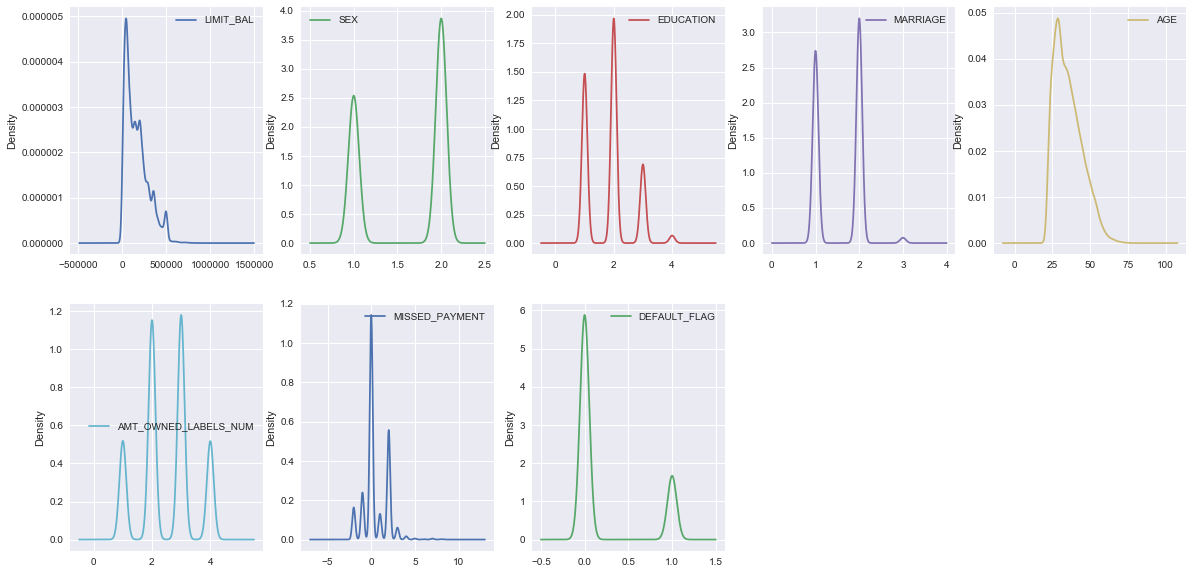

In [171]:
# Show the distributions of the feature vectors after feature engineering
creditcarddata.plot(kind='density', subplots=True, layout=(2,5), figsize=(20, 10), sharex=False)
plt.show()

After cleaning up and redefining new features, we have reduced our features count from <b>24</b> to <b>8</b>. To summarize, we have <b>replaced 18 features by deriving 2 new features</b> that are more representative of original intent of the features. Reducing features/predictors that are classified as weak will improve the model prediction and improve performance by reducing noises. 

#### 2) Apply stratified sampling to dataset to ensure distribution of training/testing class proportion is same as of the whole dataset or splitted proportionally/equally across. This treatment ensures each subgroup within the whole dataset receives proper representation within the training/testing dataset

In [172]:
# Apply stratified sampling to ensure distribution of training/testing set is splitted proportionally/equally across 
# StratifiedShuffleSplit : This module creates a single training/testing set having equally balanced(stratified) classes
# Parameters: n_iter=1 and test-size here same as in train_test_split function above
def stratifiedSplit(X,y,test_size_input):
    sss = StratifiedShuffleSplit(y, n_iter=1, test_size=test_size_input, random_state=7)

    for train_index, test_index in sss:
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    return X_train, X_test, y_train, y_test

# Define the model inputs - split data into X (features/predictors) and y (response variable)
X = creditcarddata.iloc[:,0:7] # use integer location to slice the dataset to scope it from feature 1 -23, exclude 24
y = creditcarddata.iloc[:,7:8] # scope it to 24 as the response variable - DEFAULT_FLAG

# split the X and Y data into a training and test using Stratified Sampling function defined above (stratifiedSplit)
# The training set will be used to prepare the XGBoost model and the test set will be used to make new predictions
# 70/30 rule to indicate the percentage of the data that should be held over for training/testing
X_train, X_test, y_train, y_test = stratifiedSplit(X, y, 0.3)

#### 3) Perform random under-sampling to training dataset in order to achieve a balanced dataset using imbalanced-learn API- RandomUnderSampler

In [173]:
print('Original X_train dataset shape {}'.format((X_train.shape)))

print('Original y_train dataset shape {}'.format(Counter(y_train['DEFAULT_FLAG'])))
print ('')


# Perform random under-sampling to y_train in order to achieve a balanced dataset using imbalanced-learn API
# RandomUnderSampler is a fast and easy way to balance the data by randomly selecting a subset of data for the targeted classes
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_sample(X_train, y_train)
print('Resampled X_train dataset shape {}'.format((X_resampled.shape)))
print('Resampled y_train dataset shape {}'.format(Counter(y_resampled)))

# As X_resampled and y_resampled are of dtype 'numpy.ndarray', convert it to dataframe type for model fitting.
X_resampled_df = pd.DataFrame(data=X_resampled[0:,0:],    # values
                 columns=X_train.columns)               # use columns header from X_train
y_resampled_df = pd.DataFrame(data=y_resampled[:],    # values
                 columns=y_train.columns)               # use columns header from y_train
print('')
print('After converting to dataframe type from numpy array')
print ('For X_resampled_df - There are {0} rows and {1} attributes.'.format(X_resampled_df.shape[0], X_resampled_df.shape[1]))
print ('For y_resampled_df - There are {0} rows and {1} attributes.'.format(y_resampled_df.shape[0], y_resampled_df.shape[1]))


Original X_train dataset shape (21000, 7)
Original y_train dataset shape Counter({0: 16355, 1: 4645})

Resampled X_train dataset shape (9290L, 7L)
Resampled y_train dataset shape Counter({0: 4645, 1: 4645})

After converting to dataframe type from numpy array
For X_resampled_df - There are 9290 rows and 7 attributes.
For y_resampled_df - There are 9290 rows and 1 attributes.


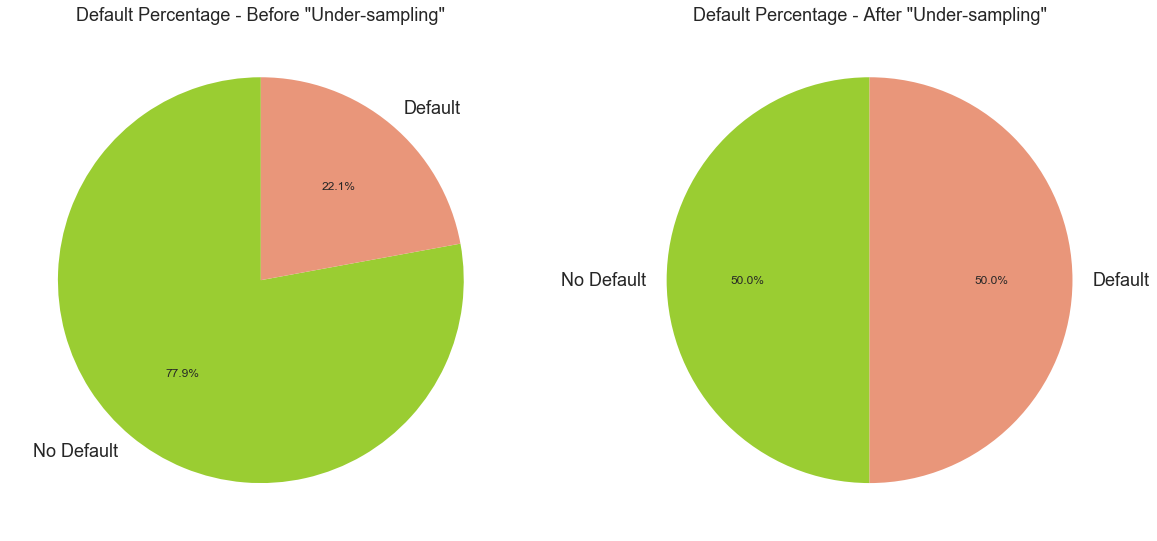

In [174]:
# Show the distribution of the dataset for the response class (y) - Before and After Undersampling
fig,(ax1, ax2) = plt.subplots(1, 2,subplot_kw={'aspect':'equal'},figsize=(20, 20), sharex=False)
sizes = y_train['DEFAULT_FLAG'].value_counts().values
patches, texts, autotexts= ax1.pie(sizes, labels=['No Default', 'Default'],
                                  colors=['yellowgreen','darksalmon'],
                                  autopct="%1.1f%%", 
                                  startangle=90)

texts[0].set_fontsize(18)
texts[1].set_fontsize(18)
ax1.set_title('Default Percentage - Before "Under-sampling"', fontsize=18)

sizes = y_resampled_df['DEFAULT_FLAG'].value_counts().values
patches, texts, autotexts= ax2.pie(sizes, labels=['No Default', 'Default'],
                                  colors=['yellowgreen','darksalmon'],
                                  autopct="%1.1f%%", 
                                  startangle=90)

texts[0].set_fontsize(18)
texts[1].set_fontsize(18)
ax2.set_title('Default Percentage - After "Under-sampling"', fontsize=18)

plt.show()

#### 4) Tune the XGBoost Model for classification to work with new features vector

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=4,
       min_child_weight=1, missing=None, n_estimators=300, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)


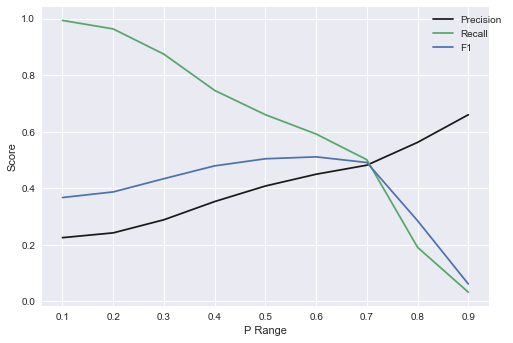

In [175]:
# fit the model with the training set and perform model tuning on'n_estimators' and 'max_depth' 
# The number of trees (or rounds) in an XGBoost model is specified to the XGBClassifier in the 'n_estimators' argument
# To control the size of decision trees, also called the number of layers or the depth using the 'max_depth' argument.
model = XGBClassifier(max_depth=4,n_estimators=300)
model.fit(X_resampled_df,y_resampled_df)
print model

# To identify the optimal threshold level to use for prediction probabilities rather than just purely rounding
p_range = np.arange(0.1, 1, 0.1) 
p_range
precisions = []
recalls = []
f1s = []

y_pred = model.predict_proba(X_test)
for p in p_range:

    pred_tmp = y_pred[:, 1].copy()
    pred_tmp[pred_tmp > p] = 1
    pred_tmp[pred_tmp <= p] = 0
    tn, fp, fn, tp = confusion_matrix(y_test, pred_tmp).ravel()
    prec = (float(tp)/(tp + fp))
    rec = (float(tp)/(tp + fn))
    f1 = 2 * prec * rec / (prec + rec)
    precisions.append(prec)
    recalls.append(rec)
    f1s.append(f1)

# plot the results
plt.plot(p_range, precisions, 'k', label='Precision')
plt.plot(p_range, recalls, 'g', label='Recall')
plt.plot(p_range, f1s, 'b', label='F1')
plt.xlabel('P Range')
plt.ylabel('Score')
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1))

Based on the above result, we will set the <b>optimal threshold level to 0.7</b>, since that the P-value that maximizes the precision,recall and f1 score.

In [176]:
# make predictions for test data and round the prediction probabilities.. 
# alternatively, can also apply a threshold that maximises recall/precision/f1 score instead of rounding
y_pred = model.predict(X_test)
# XGBoost outputs probabilities by default and not actual class labels. 
# Apply the threshold value=0.7 determined above
p = 0.7
y_pred[y_pred > p] = 1
y_pred[y_pred <= p] = 0

# model evaluation based on performance measures
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %.2f%%' % (accuracy * 100.0))
print('Error Rate: %.2f%%' % (100-(accuracy * 100.0)))
print('')

print ('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

print('')
print('Precision:%.2f%%' % ((float(tp)/(tp + fp))* 100.0))
print('Recall: %.2f%%' % (((float(tp)/(tp + fn)))* 100.0))

Accuracy: 71.28%
Error Rate: 28.72%

Confusion Matrix:
[[5101 1908]
 [ 677 1314]]

Precision:40.78%
Recall: 66.00%


### Review the results and the Performance Metrics

After performing the 4 steps above, we are able to see that although the <b>accuracy and precision score has dropped from 82.04% and 67.33% to 71.28% and 40.78% respectively</b>, we have managed to double the <b>recall rate from 35.79% to 66%</b>, which is the objective that we are trying to improve earlier on our prediction model.


### Plot the Feature Importance Scores in XGBoost
Generally, importance provides a score that indicates how useful or valuable each feature was in the construction of the boosted decision trees within the model. The more an attribute is used to make key decisions with decision trees, the higher its relative importance.

10.0


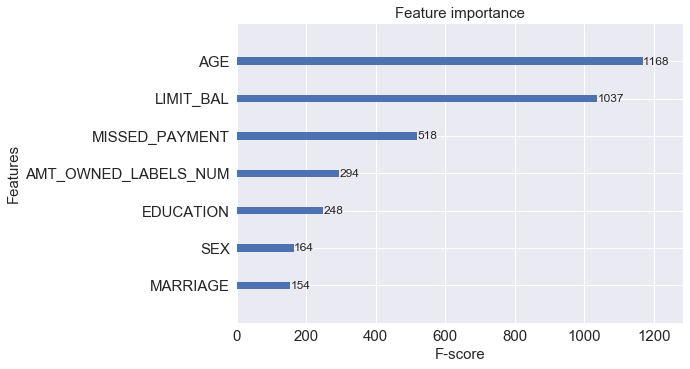

In [177]:
from xgboost import plot_importance
plot_importance(model)
plt.rcParams["font.size"] = 10
print(plt.rcParams["font.size"])
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlabel('F-score', fontsize=15)
plt.ylabel('Features', fontsize=15)
plt.title('Feature importance', fontsize=15)
plt.show()
plt.rcParams["figure.figsize"] = [8, 8]

Based on the above feature importances plot, we are able to have an understanding of what is driving the splits for the XGBoost decision trees. Potentially, we are able do <b>Feature Selection with XGBoost Feature Importance Scores</b> to build a better model. From the above, <b>AGE, LIMIT_BAL, MISSED_PAYMENT and AMT_OWNED_LABELS_NUM</b> are quite significantly used in the decison tree and are of higher importance as compared to <b>SEX or MARRIAGE</b>. 

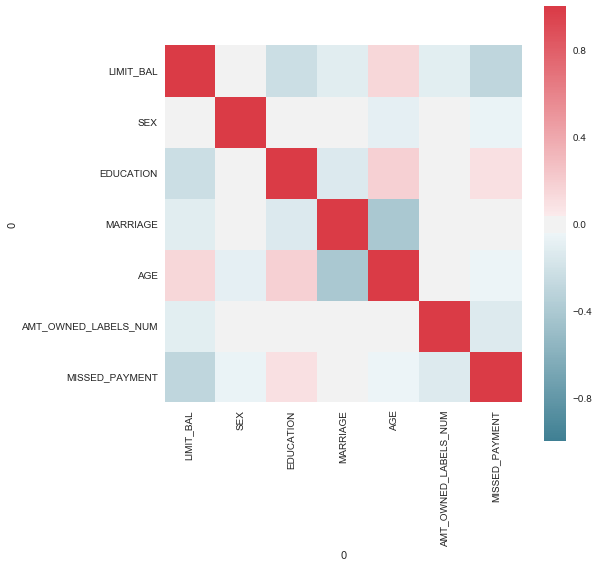

In [178]:
f, ax = plt.subplots(figsize=(8, 8))
corr = X.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), 
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

### Create the partial dependency plots to extract insights from XGBoost classification model above
Partial dependence plot is plotting each independent variable (X1) vs the model outcome (y), after considering the average effect of other independent variables (X2,X3..Xn) in the model. The purpose is to describe the scenario when all other variables are fixed, how the average response (y) depends on a feature/predictor(X).


In [179]:
def partial_dependency(model, X, features, selected_feature, floor):
    # The model could be an XGBoost sklearn fitted instance (or anything else with a predict method)
    """
    Calculate the dependency (or partial dependency) of a response variable on a predictor (or multiple predictors)
    1. Sample a grid of values of a predictor.
    2. For each value, replace every row of that predictor with this value, calculate the average prediction.
    """
    X_temp = X.copy()
    grid = np.linspace(np.percentile(X_temp.loc[:, selected_feature], 0.1), 
                       np.percentile(X_temp.loc[:, selected_feature], 99.5), 
                       50)
    y_pred = np.zeros(len(grid))
    
    for i, val in enumerate(grid):
        X_temp.loc[:, selected_feature] = val
        p = model.predict_proba(X_temp.loc[:, features])[:, 1].mean()
        y_pred[i] = p
    return grid, y_pred

In [180]:
# Prepare the selected features to be used for partial dependencies
selected_names = X.columns[np.where(model.feature_importances_>0)]
feature_names = X.columns
print feature_names

Index([u'LIMIT_BAL', u'SEX', u'EDUCATION', u'MARRIAGE', u'AGE',
       u'AMT_OWNED_LABELS_NUM', u'MISSED_PAYMENT'],
      dtype='object', name=0)


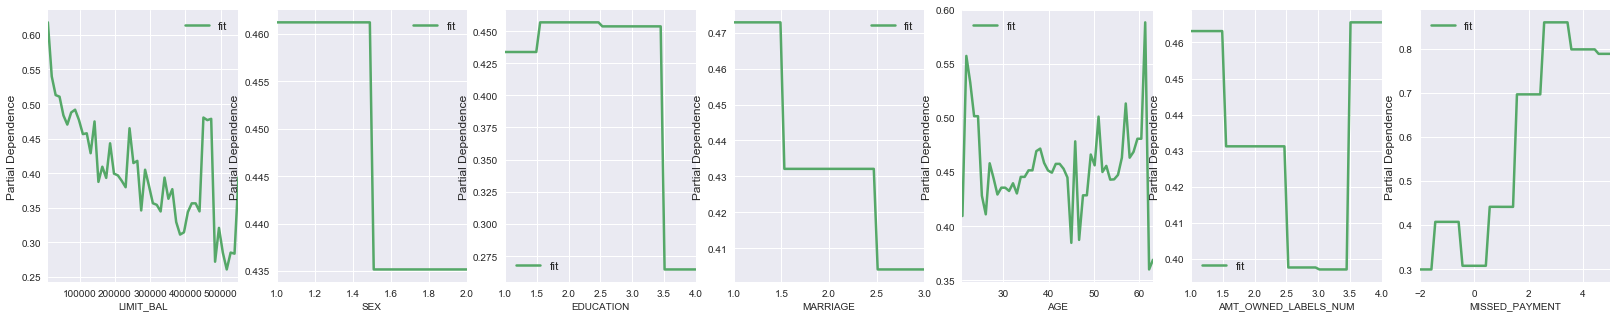

In [181]:
%matplotlib inline

fig, ax = plt.subplots(1, len(selected_names))
fig.set_size_inches(len(selected_names) * 4, 5)

y_pred_list = []
grid_list = []
for i, f in enumerate(selected_names):
    grid, y_pred = partial_dependency(model, X, feature_names, 
                                      f, 50)
    y_pred_list.append(y_pred)
    grid_list.append(grid)
    if i ==0 and len(feature_names) == 1:
        axis = ax
    else:
        axis = ax[i]
        
    axis.plot(grid, y_pred, '-', color = 'g', linewidth = 2.5, label='fit')
#     axis.plot(X.loc[:, f], y, 'o', color = 'grey', alpha = 0.01)
# 
    axis.set_xlim(min(grid), max(grid))
    axis.set_xlabel(f, fontsize = 10)
    axis.set_ylabel('Partial Dependence', fontsize = 12)
    
    handles, labels = axis.get_legend_handles_labels()
    axis.legend(handles, labels, loc = 'best', fontsize = 12)

#### Analysis : Interpreting the Partial Dependence Plots based on the fitted model

Recall that the model is predicting whether an observation will <b>default/no-default with value ranging between 1 and 0</b>. We trace out how the predicted probability of default changes (on the y-axis) as we move from small values of measurement to large values of measurement (on the x-axis) based on the feature/predictor being analyzed. 

1) <b><font color="FF5733">LIMIT_BAL</font></b>: <i>From the above, we can see that lower LIMIT_BAL around NT100,000 has a greater risk of default as compared to those with LIMIT_BAL of around NT500,000 with default probability dropping by more than 50% from 0.6 to 0.3</i>. 

2) <b><font color="FFBD33">SEX</font></b>: <i> Gender doesn't seem to be a determining factor in indicating whether a male or female is more likely to default. This observation matches with the feature_importance score above that indicate this as a weak feature/predictor for classification. </i>

3) <b><font color="FF5733">EDUCATION</font></b>: <i> Surprisingly, higher educated individuals (Those who graduated from grad school/university) has an higher rate of defaulting as compared to those that studied in high school/others.</i>

4) <b><font color="FFBD33">MARRIAGE</font></b>: <i> Being single or married doesn't seem to be a determining factor in indicating whether an individual is more likely to default. This observation matches with the feature_importance score above that indicate this as a weak feature/predictor for classification. </i>

5) <b><font color="FF5733">AGE</font></b>: <i>Generally, younger people (30-40) have a lower risk of default as compared to older people (>50), with the default probability spiking by 50% from 0.4 to 0.6 when compared with around 30 years of age.</i>

6) <b><font color="FF5733">AMT_OWNED_LABELS_NUM</font></b>: <i>Recall that for this feature (4=None, 3=Low, 2=Medium, 1=High), we can see that those people that owned HIGH(1) and MEDIUM(2) amount of money has a greater risk of default as compared to people who belongs to the Low(3) category. </i>

7) <b><font color="FF5733">MISSED_PAYMENT</font></b>: <i>Recall that for this feature (-1 is good, >1 is bad), we can see that those people that has not missed any payments and classified under the 'Good' category are less likely to default as compared to those that falls under the 'BAD' category, with default risk spiking by almost 200%.</i>

### Ideas for improvement and summary of the project

We took a credit card dataset and attemptted to gain insights on the data to discover what are the features/predictors that are important and could be used to build a prediction model to classified if an individual will likely default. To summarize this are the steps being done in this project:

<b>Initial Stage</b> <br/>
1) Data preprocessing and cleaning <br/>
2) Build the classification model using XGBoost and review the performance metrics<br/>

<b>Intermediate Stage</b><br/>
3) Derive new and meaningful features for classification from existing features vector <br/>
4) Apply stratified sampling to dataset to ensure distribution of training/testing class proportion is same as of the whole dataset or splitted proportionally/equally across. This treatment ensures each subgroup within the whole dataset receives proper representation within the training/testing dataset <br/>
5) Target class rebalancing to ensure that the training dataset is 50/50 distribution of default/non-default observations using Undersampling from imbalanced-learn APIs <br/>
6) Tune the XGBoost model using parameters such as 'max_depth' and 'n_estimators'<br/>

<b>Final Stage</b><br/>
7) Plot the Feature Importance Scores in XGBoost<br/>
8) Create the partial dependency plots to extract insights from XGBoost classification model<br/>
9) Analysis : Interpreting the Partial Dependence Plots based on the fitted model <br/>

<b> Ideas for improvement of the project: </b><br/>
1) Implement cross-validation using k fold with scikit-learn to improve the performance metrics<br/>
2) Compare and contrast XGBoost classifer versus Random Forest, Navies Bayes and Logistic Regression to determine which model is better for prediction <br/>

### References and Acknowledgements

1) http://xgboost.readthedocs.io/en/latest/python/python_intro.html <br/>
2) https://machinelearningmastery.com/develop-first-xgboost-model-python-scikit-learn/ <br/>
3) https://medium.com/towards-data-science/introducing-pdpbox-2aa820afd312 <br/>
4) https://qizeresearch.wordpress.com/2013/12/12/partial-dependence-plot/ <br/>
5) https://stats.stackexchange.com/questions/121383/interpreting-y-axis-of-a-partial-dependence-plots <br/>
6) http://athena.ecs.csus.edu/~gomezja/FinalProjectReport.pdf <br/>
7) https://rpubs.com/kfolsom98/160773 <br/>
8) https://machinelearningmastery.com/data-preparation-gradient-boosting-xgboost-python/ <br/>
9) https://stackoverflow.com/questions/30023927/sklearn-cross-validation-stratifiedshufflesplit-error-indices-are-out-of-bou <br/>
10) https://github.com/scikit-learn-contrib/imbalanced-learn <br/>
11) https://machinelearningmastery.com/tune-number-size-decision-trees-xgboost-python/ <br/>
12) https://datascience.stackexchange.com/questions/17364/gradient-boosting-tree-the-more-variable-the-better/17365 <br/>
13) https://www.kaggle.com/dansbecker/partial-dependence-plots<br/>